In [18]:
#Se trabajará con regresión logistica para el presente trabajo
#Se inicia importando las librerias necesarias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

#Se procede a cargar el dataset de titanic para la fase actual
data =pd.read_csv(r'C:\Users\leecu\Music\9 SEMESTRE\Analisis de Datos - 202016908_37\Titanic-Dataset.csv')


In [20]:
#Se previsualiza los datos del dataset en una tabla generada a continuación
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [22]:
#muestra la información de las culmnas y sus tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#Aca se va a poder visualizar las estadsticas de los datos en estudio
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#convertir datos tipo objeto a tipo decimal para el correcto funcionamiento de los analisis posteriores 
data['Sex'] = data ['Sex'].replace({'female': 1, 'male': 2})

C:\Users\leecu\AppData\Local\Temp\ipykernel_2364\4113549958.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data ['Sex'].replace({'female': 1, 'male': 2})


In [28]:
print(data['Sex'].head())

0    2
1    1
2    1
3    1
4    2
Name: Sex, dtype: int64


In [30]:
#Se realiza un analiss en los datos, con el fin de encontrar valores nullos
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#Se rellenan los valores faltantes con el valor más repetido en la columna ajustandose a los datos no nulos 
for col in data.select_dtypes(include=[np.number]).columns:
    data [col] = data[col].fillna(data[col].mean())

In [38]:
# Se Verifica cuántos valores nulos hay luego de rellenar los datos faltantes encontrados previamente
print("\nValores nulos después de rellenar:")
print(data.isnull().sum())


Valores nulos después de rellenar:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


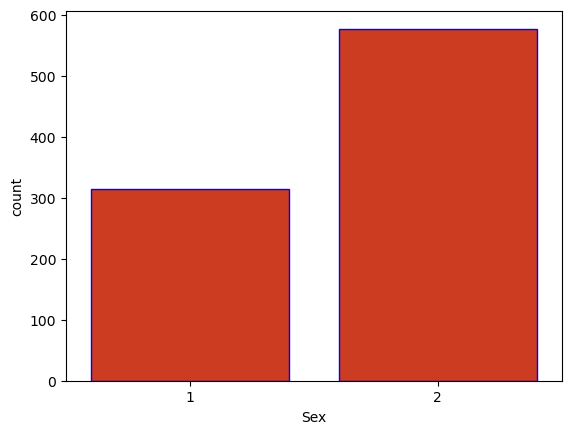

In [46]:
#Se realiza un analisis para ver el comportamiento de las variables categoricas de la siguiente manera
sns.countplot(x='Sex', data=data, color='#E72903', edgecolor='blue')
plt.show()

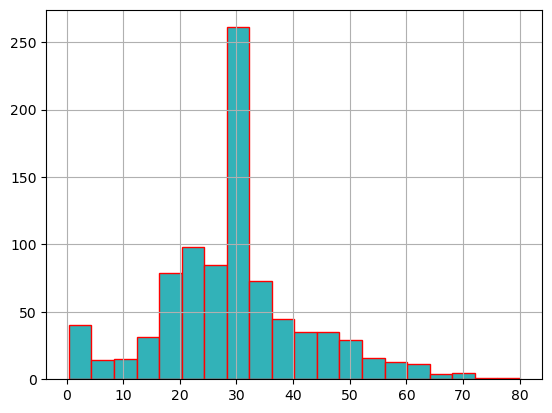

In [44]:
#Se realiza un histograma para verificar el comportamiento de la variable age (edad)
data['Age'].hist(bins=20, color='#32B2B8', edgecolor='red')
plt.show()

In [48]:
#Vamos a crear una paleta de colores personalizada
colores_hex = ['#30C129', '#E1D209', '#8507E3', '#02E3E8', '#58925F']

# guardar la paleta personalizada
cool_palette = sns.color_palette(colores_hex)

#si se requiere configurar la paleta globalmente con sns.set_palette
sns.set_palette(cool_palette)

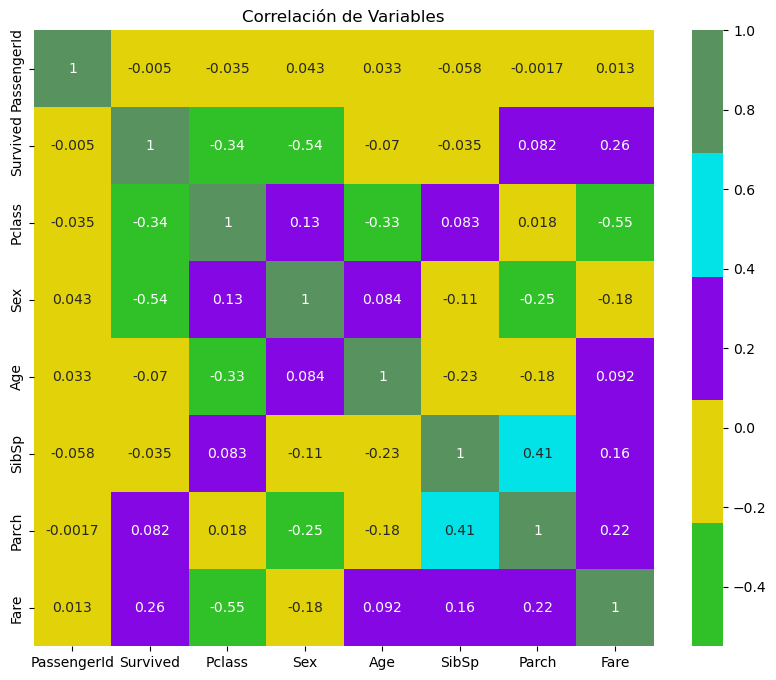

In [50]:
#Se realiza un analisi bivariado referente a variables numéricas, mediante una grafica de correlación 
#Columnas numéricas
nm_data = data.select_dtypes(include=['float64', 'int64'])
# calcular la matriz de correlación
correlation_matrix = nm_data.corr()
# Se crea la grafica con la paleta personalizada anteriormente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cool_palette)
plt.title("Correlación de Variables")
plt.show()

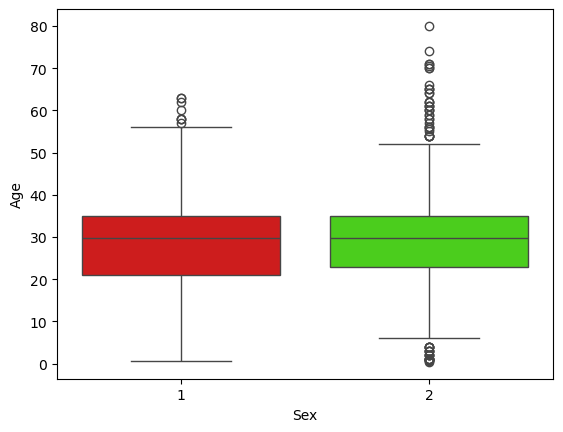

In [54]:
#Se realiza una relación entre variables categóricas y numéricas para ver el comportamiento
c_p = {1: '#EA0000', 2: '#3DEA00'}  

sns.boxplot(x='Sex', y='Age', data=data, hue='Sex', palette=c_p, legend=False)
plt.show()

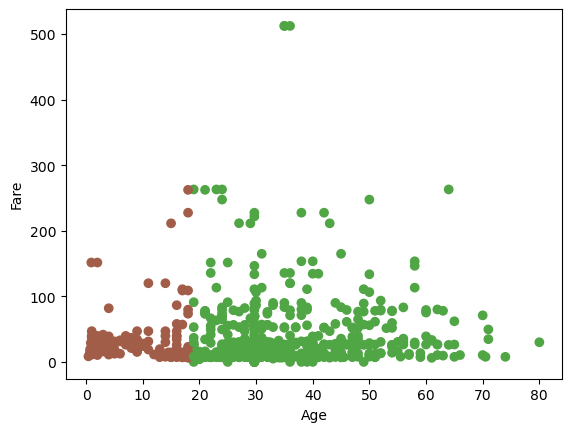

In [58]:
#Se observa las relaciones entre variables numericas para los respectivos analisis
#se crea una setencia para que cada variable tenga un color diferente
#Umbral de 18:
#Grupo 1 (Menores de 18 años): Aquellos pasajeros cuya edad es menor o igual a 18 años.
#Grupo 2 (Mayores de 18 años): Aquellos pasajeros cuya edad es mayor a 18 años. 
ul_edad = 18
colors = []
for age, fare in zip(data['Age'], data['Fare']):
    if age > ul_edad:
        colors.append('#50A545')  
    else:
        colors.append('#A25D48')  

# Se realiza el grafico 
plt.scatter(data['Age'], data['Fare'], c=colors)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [60]:
#Se calcula los cuartiles en 1 y 3
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
#Se Calcula el IQR
IQR = Q3 - Q1
#Se Define los outliers a partir del IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identificar los outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outliers_age = outliers[[ 'Age']]
print(outliers_age)

       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
54   65.00
78    0.83
94   59.00
96   71.00
116  70.50
119   2.00
152  55.50
164   1.00
170  61.00
172   1.00
174  56.00
183   1.00
195  58.00
205   2.00
232  59.00
252  62.00
268  58.00
275  63.00
280  65.00
297   2.00
305   0.92
326  61.00
340   2.00
366  60.00
381   1.00
386   1.00
438  64.00
456  65.00
467  56.00
469   0.75
479   2.00
483  63.00
487  58.00
492  55.00
493  71.00
530   2.00
545  64.00
555  62.00
570  62.00
587  60.00
625  61.00
626  57.00
630  80.00
642   2.00
644   0.75
647  56.00
659  58.00
672  70.00
684  60.00
694  60.00
745  70.00
755   0.67
772  57.00
788   1.00
803   0.42
824   2.00
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00


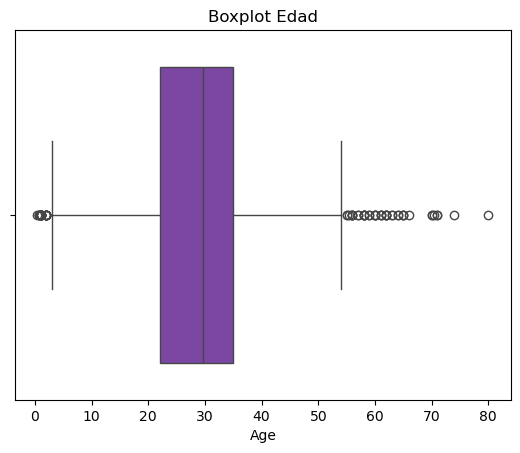

In [66]:
# Se Crea un boxplot con el fin de visualizar el comportamiento de los otliers para la variable.
sns.boxplot(x=data['Age'], color='#7E37B3')
plt.title('Boxplot Edad')
plt.show()

In [68]:
#Se Selecciona las variables independientes y variable dependiente para el modelo
data = data[['Sex', 'Age', 'Pclass', 'Fare', 'Survived']]

In [70]:
#Se definen las variables respecto a X y Y 
# Independientes
X = data[['Sex', 'Age', 'Pclass', 'Fare']] 
# Dependiente
y = data['Survived']  

In [72]:
from sklearn.preprocessing import StandardScaler
#Se crea una instancia del escalador
scaler = StandardScaler()
#Se procede a Normalizar las variables 'Fare' y 'age'
X.loc[:, ['Fare', 'Age']] = scaler.fit_transform(X[['Fare', 'Age']])
print(X[['Fare', 'Age']].head())

       Fare       Age
0 -0.502445 -0.592481
1  0.786845  0.638789
2 -0.488854 -0.284663
3  0.420730  0.407926
4 -0.486337  0.407926


In [74]:
# Dividir el dataset en conjunto de train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Se crea el modelo de regresión logística
modelo = LogisticRegression(max_iter=200)

In [78]:
#Se procede a entrenar el modelo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [80]:
from sklearn.metrics import classification_report

In [82]:
#Se realiza las predicciones del modelo
y_pred = modelo.predict(X_test)

In [84]:
# Evaluación del modelo de regresión lineal
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7989
Confusion Matrix:
[[89 16]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



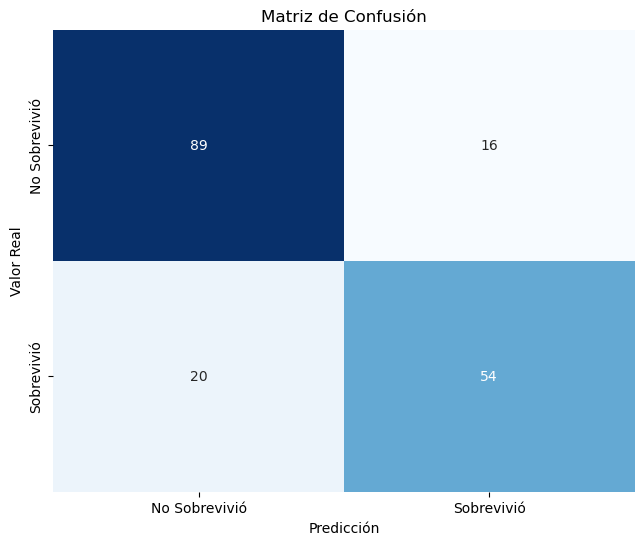

In [90]:
#Se Genera la matriz de confusión del modelo entrenado
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) para la matriz de confusión
plt.figure(figsize=(7.5, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Sobrevivió', 'Sobrevivió'], 
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

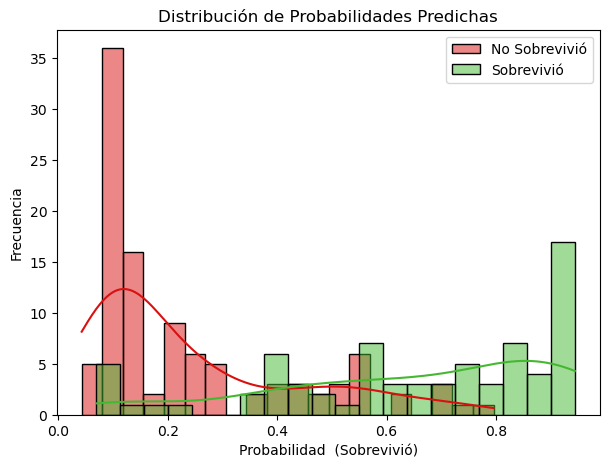

In [94]:
#Se obtienen las probabilidades predichas para la clase 1 del modelo (Sobrevivió)
y_prob = modelo.predict_proba(X_test)[:, 1]  

#Se realiza un histograma de las probabilidades predichas
plt.figure(figsize=(7, 5))

# Histograma para la clase 0 (No Sobrevivió) y clase 1 (Sobrevivió)
sns.histplot(y_prob[y_test == 0], kde=True, color='#DA1010', label='No Sobrevivió', bins=20)  # Azul claro
sns.histplot(y_prob[y_test == 1], kde=True, color='#45B832', label='Sobrevivió', bins=20)  # Gris claro

plt.xlabel('Probabilidad  (Sobrevivió)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas')
plt.legend()
plt.show()